In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import joblib

In [ ]:
df = pd.read_csv(r"D:\regression\Mobiles(2025).csv",encoding="latin1")

In [ ]:
# Checking general info with a focus on columns and dtypes - I noticed that only the release year was an int, so I would need to perform formatting.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [ ]:
# standard check for missing/null values
df.isnull().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [11]:
# viewing the dataframe in a general way

display(df)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","ï¿½13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


In [12]:
# analysis of the ram column

df['RAM'].unique()

array(['6GB', '8GB', '4GB', '3GB', '12GB', '2GB', '1.5GB', '16GB', '10GB',
       '1GB', '8GB / 12GB'], dtype=object)

In [13]:
# finding the most repeated values in the ram column

df['RAM'].value_counts()

RAM
8GB           308
6GB           206
12GB          193
4GB           146
3GB            34
16GB           31
2GB             6
1.5GB           2
8GB / 12GB      2
10GB            1
1GB             1
Name: count, dtype: int64

In [14]:
# general filter, removing outliers and uninteresting values for analysis

df = df[~df['RAM'].isin(['8GB / 12GB', '1.5GB', '10GB', '1GB', '2GB'])]

# viewing the filtering

df['RAM'].value_counts()

RAM
8GB     308
6GB     206
12GB    193
4GB     146
3GB      34
16GB     31
Name: count, dtype: int64

In [15]:
# function to format column values

import re

def convert_value(value, unit=None):

    number = re.sub(r'[^\d.]', '', value) # exemple: $1,2345 -> 12345 | $1.2345 -> 1.2345

    if not number:
        return np.nan

    parts = number.split('.') # exemple: 1.234.5 -> ['1', ''234, '5']

    if len(parts) > 1:
        number = f"{parts[0]}.{''.join(parts[1:])}" # exemple: ['1', '234', '5'] -> 1.2345
    else:
        number = parts[0]
    
    if '.' in number:
        number = float(number)
    else:
        number = int(number)
    
    if unit == 'PKR':
        number *= 0.003
    elif unit == 'INR':
        number *= 0.01
    elif unit == 'CNY':
        number *= 0.14
    elif unit == 'AED':
        number *= 0.27

    return number

    # exchange rate query performed on 03/17/2025

In [16]:
# applying the function to the columns using lambda

df['RAM'] = df['RAM'].apply(lambda x: convert_value(x))
df['Battery Capacity'] = df['Battery Capacity'].apply(lambda x: convert_value(x))
df['Screen Size'] = df['Screen Size'].apply(lambda x: convert_value(x))
df['Back Camera'] = df['Back Camera'].apply(lambda x: convert_value(x))
df['Front Camera'] = df['Front Camera'].apply(lambda x: convert_value(x))
df['Mobile Weight'] = df['Mobile Weight'].apply(lambda x: convert_value(x))
df['Launched Price (USA)'] = df['Launched Price (USA)'].apply(lambda x: convert_value(x))

df['Launched Price (Pakistan)'] = df['Launched Price (Pakistan)'].apply(lambda x: convert_value(x, 'PKR'))
df['Launched Price (India)'] = df['Launched Price (India)'].apply(lambda x: convert_value(x, 'INR'))
df['Launched Price (China)'] = df['Launched Price (China)'].apply(lambda x: convert_value(x, 'CNY'))
df['Launched Price (Dubai)'] = df['Launched Price (Dubai)'].apply(lambda x: convert_value(x, 'AED'))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               918 non-null    object 
 1   Model Name                 918 non-null    object 
 2   Mobile Weight              918 non-null    float64
 3   RAM                        918 non-null    int64  
 4   Front Camera               918 non-null    float64
 5   Back Camera                918 non-null    float64
 6   Processor                  918 non-null    object 
 7   Battery Capacity           918 non-null    int64  
 8   Screen Size                918 non-null    float64
 9   Launched Price (Pakistan)  917 non-null    float64
 10  Launched Price (India)     918 non-null    float64
 11  Launched Price (China)     918 non-null    float64
 12  Launched Price (USA)       918 non-null    float64
 13  Launched Price (Dubai)     918 non-null    float64
 14 

In [18]:
df.isnull().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    1
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [19]:
# removing null values

df = df.dropna()

In [20]:
display(df)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174.0,6,12.0,48.0,A17 Bionic,3600,6.10,674.997,799.99,811.86,799.0,755.73,2024
1,Apple,iPhone 16 256GB,174.0,6,12.0,48.0,A17 Bionic,3600,6.10,704.997,849.99,853.86,849.0,809.73,2024
2,Apple,iPhone 16 512GB,174.0,6,12.0,48.0,A17 Bionic,3600,6.10,734.997,899.99,909.86,899.0,863.73,2024
3,Apple,iPhone 16 Plus 128GB,203.0,6,12.0,48.0,A17 Bionic,4200,6.70,749.997,899.99,867.86,899.0,863.73,2024
4,Apple,iPhone 16 Plus 256GB,203.0,6,12.0,48.0,A17 Bionic,4200,6.70,779.997,949.99,909.86,949.0,917.73,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,POCO,M7 5G 128GB,198.0,6,8.0,50.0,MediaTek Dimensity 7025,5110,6.67,119.997,159.99,223.86,229.0,242.73,2024
925,Poco,Pad 5G 128GB,571.0,8,8.0,8.0,Snapdragon 7s Gen 2,10000,12.10,198.660,239.99,293.86,280.0,277.83,2024
926,Poco,Pad 5G 256GB,571.0,8,8.0,8.0,Snapdragon 7s Gen 2,10000,12.10,213.660,259.99,321.86,300.0,296.73,2024
927,Samsung,Galaxy Z Fold6 256GB,239.0,12,104.0,50.0,Snapdragon 8 Gen 3,4400,7.60,1814.997,1649.99,1959.86,1899.0,1943.73,2024


In [21]:
# checking the descriptions of the ram column

df['RAM'].describe()

count    917.000000
mean       7.836423
std        3.141750
min        3.000000
25%        6.000000
50%        8.000000
75%        8.000000
max       16.000000
Name: RAM, dtype: float64

C:\Users\Bablu\AppData\Local\Temp\ipykernel_7104\4054345499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='RAM', order=ram_order, palette='viridis')


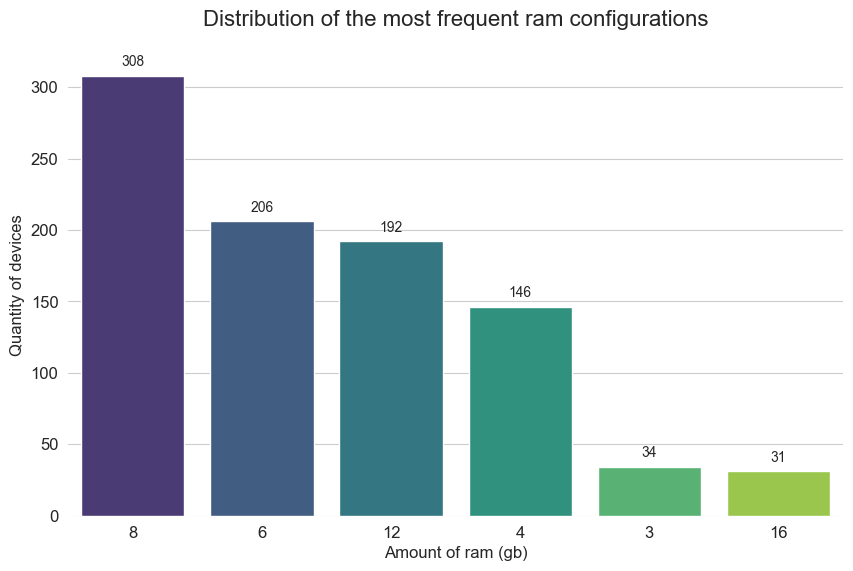

In [22]:
# creating a chart to visualize the distribution of the 6 most frequent ram values

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ram_order = df['RAM'].value_counts().nlargest(6).index

ax = sns.countplot(data=df, x='RAM', order=ram_order, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')
    
plt.title("Distribution of the most frequent ram configurations", fontsize=16, pad=20)
plt.xlabel("Amount of ram (gb)", fontsize=12)
plt.ylabel("Quantity of devices", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine(left=True, bottom=True)

plt.show()

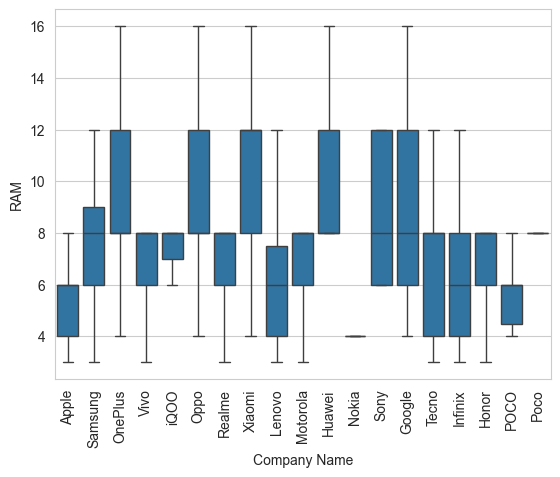

In [23]:
# visualization of ram distribution by smartphone brands

sns.boxplot(data=df, x='Company Name', y='RAM', showfliers=False)
plt.xticks(rotation=90)
plt.show()

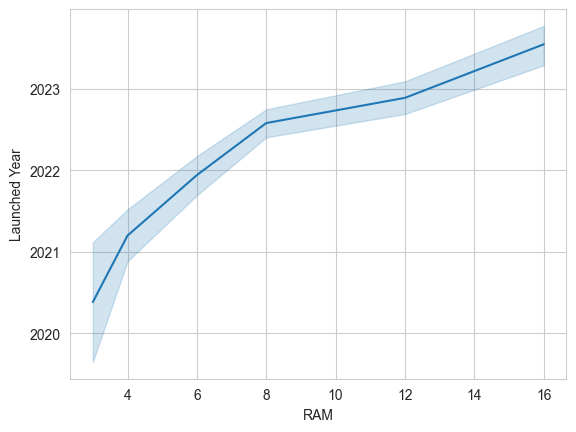

In [24]:
# visualization of the evolution of ram configuration over the release years

sns.set_style("whitegrid")
sns.lineplot(data=df, x='RAM', y='Launched Year', estimator='mean');

In [25]:
# finding the most repeated values in the usa launch price column

df['Launched Price (USA)'].value_counts()

Launched Price (USA)
299.0      44
499.0      44
899.0      43
399.0      43
1099.0     42
           ..
2599.0      1
877.0       1
39622.0     1
289.0       1
1719.0      1
Name: count, Length: 94, dtype: int64

In [26]:
# general analysis for outlier detection (found)

df['Launched Price (USA)'].unique()

array([  799.  ,   849.  ,   899.  ,   949.  ,   999.  ,  1049.  ,
        1099.  ,  1199.  ,  1299.  ,  1399.  ,   699.  ,  1249.  ,
         749.  ,   599.  ,   329.  ,   429.  ,   399.  ,   499.  ,
        1599.  ,  1799.  ,  1899.  ,   449.  ,   349.  ,   299.  ,
         249.  ,   199.  ,   179.  ,   169.  ,  1499.  ,   549.  ,
         229.  ,   149.  ,   649.  ,   219.  ,   159.  ,   269.  ,
         319.  ,   239.  ,   279.  ,   189.  ,   139.  ,   129.  ,
         259.  ,   470.  ,   500.  ,   380.  ,   400.  ,   420.  ,
         360.  ,   340.  ,   320.  ,   270.  ,   290.  ,   250.  ,
         220.  ,   240.  ,   300.  ,   200.  ,   260.  ,   180.  ,
         160.  ,   210.  ,   230.  ,   130.  ,   170.  ,   190.  ,
         150.  ,   440.  ,   330.  ,   350.  ,   280.  ,   310.  ,
         634.99,   790.77,   374.9 ,   379.  ,   309.  ,   479.  ,
         370.  ,   450.  ,  2699.  ,  2499.  ,  2599.  ,  2799.  ,
         529.  ,   729.  ,  1699.  , 39622.  ,   877.  ,    99

In [27]:
# outlier removal

df = df.drop(df[df['Launched Price (USA)'] == 39622].index)

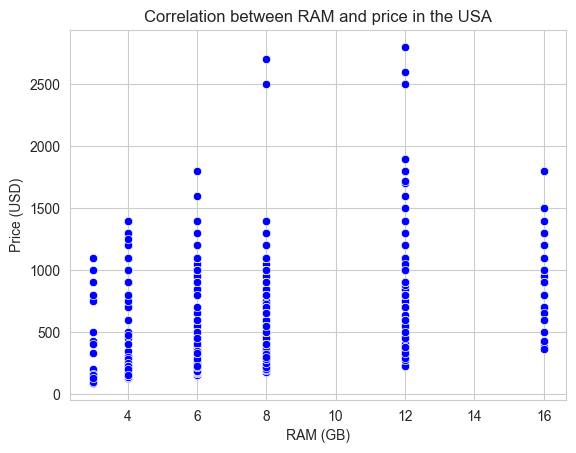

In [28]:
# scatter plot to visualize the relationship between ram and price in the usa

sns.scatterplot(data=df, x='RAM', y='Launched Price (USA)', color='blue')
plt.title('Correlation between RAM and price in the USA')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.show()

In [29]:
df[['Launched Price (USA)', 'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (Dubai)']].describe()

,Launched Price (USA),Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (Dubai)
count,916.000000,916.000000,916.000000,916.000000,916.000000
mean,584.531288,378.878096,507.183013,535.685699,590.875841
std,417.093367,305.184551,406.589187,381.045273,418.233111
min,89.000000,55.497000,69.990000,76.860000,94.230000
25%,269.000000,164.997000,199.990000,251.860000,270.000000
50%,449.000000,256.498500,349.990000,405.860000,458.730000
75%,849.000000,539.997000,749.000000,769.860000,863.730000
max,2799.000000,1814.997000,2749.990000,2519.860000,2996.730000


In [30]:
mean_prices = df[['Launched Price (USA)', 'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (Dubai)']].mean().sort_values(ascending=False)

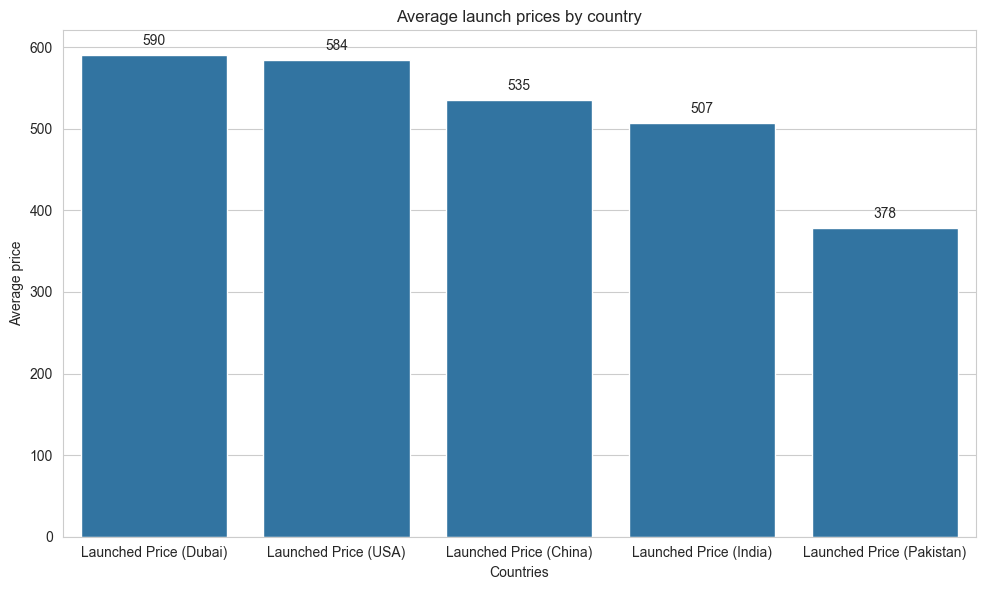

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=mean_prices.index, y=mean_prices.values)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Average launch prices by country')
plt.ylabel('Average price')
plt.xlabel('Countries')
plt.tight_layout()
plt.show()

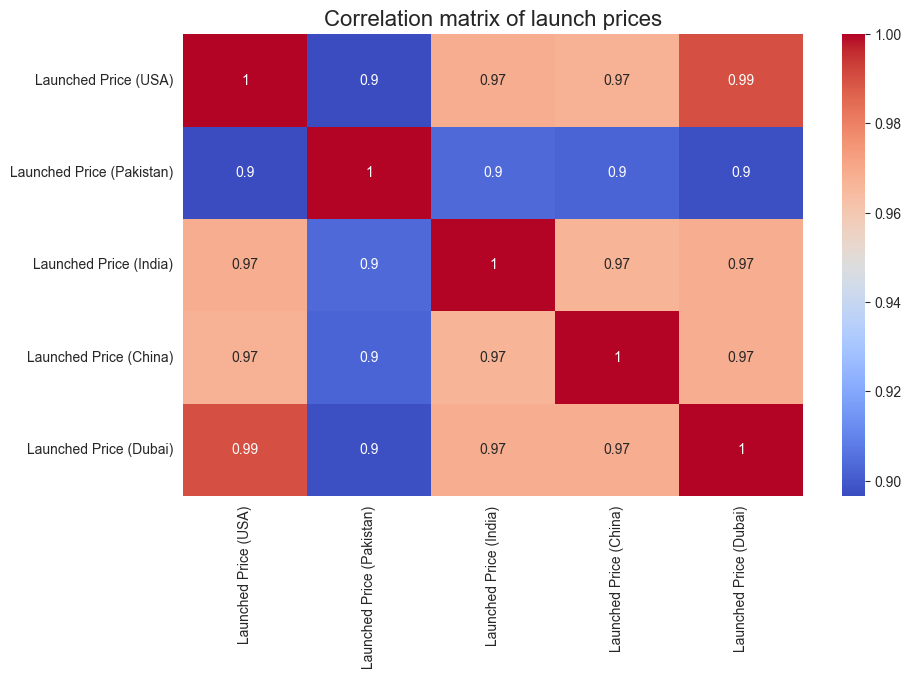

In [32]:
# correlation matrix of launch prices

corr = df[['Launched Price (USA)', 'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (Dubai)']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm',)
plt.title('Correlation matrix of launch prices', fontsize=16)
plt.show()

In [33]:
most_expensive_country = mean_prices.idxmax()
cheapest_country = mean_prices.idxmin()

display(most_expensive_country)
display(cheapest_country)

'Launched Price (Dubai)'

'Launched Price (Pakistan)'

In [34]:
mean_specs_company = df.groupby('Company Name')[['RAM', 'Battery Capacity', 'Screen Size']].mean()

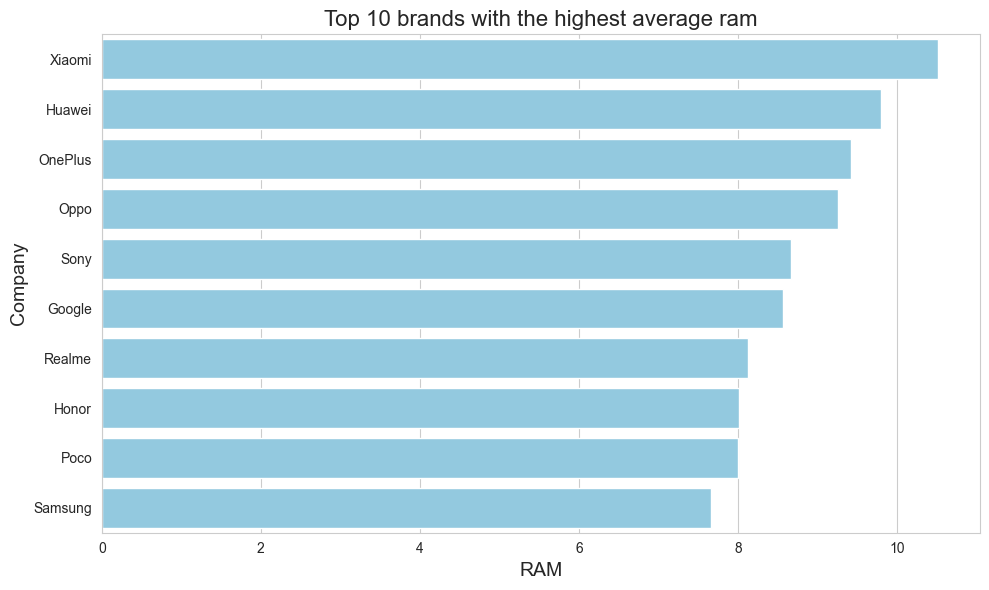

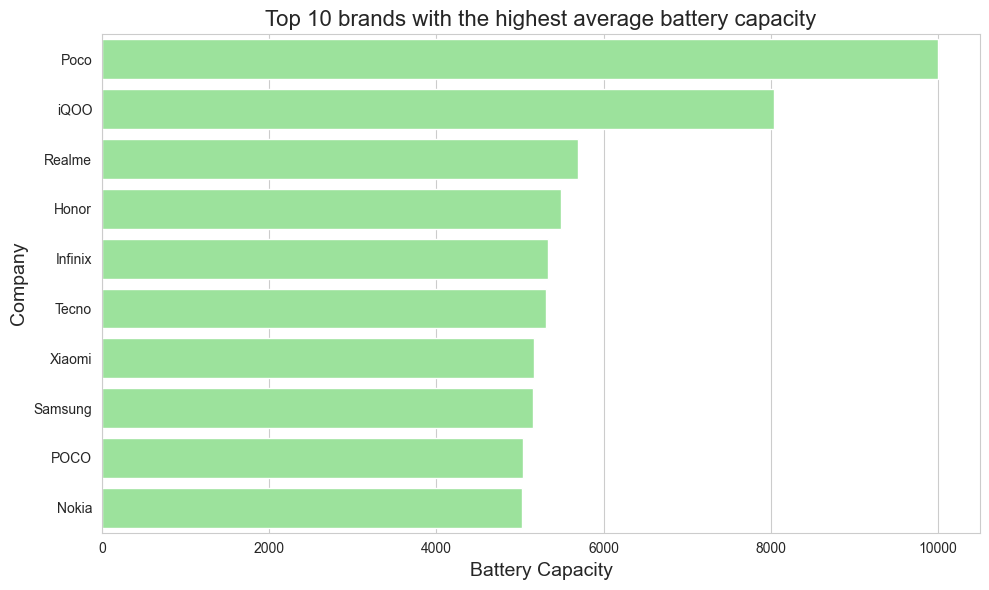

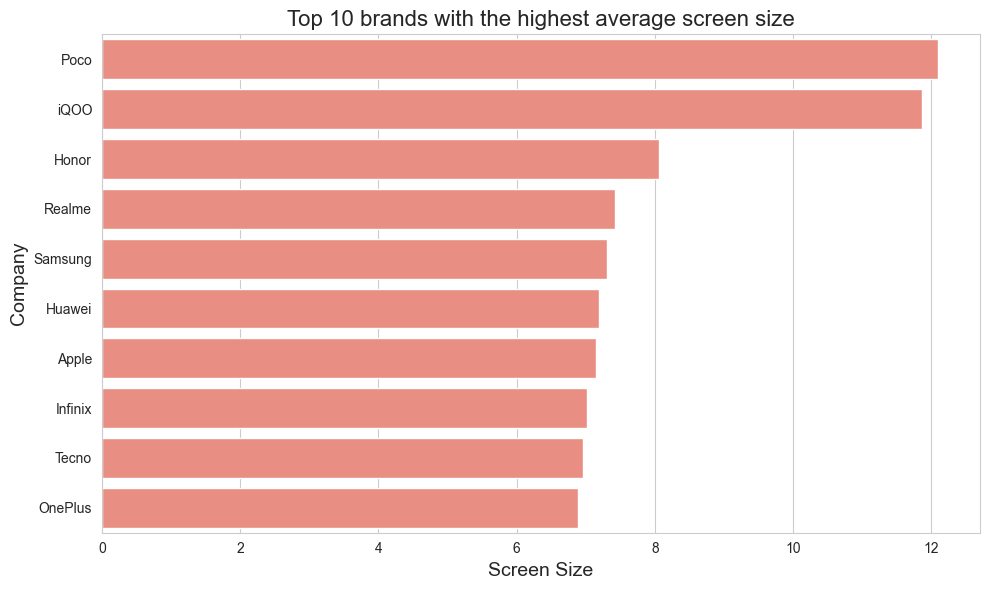

In [35]:
top_10_ram = mean_specs_company.nlargest(10, 'RAM')
top_10_battery = mean_specs_company.nlargest(10, 'Battery Capacity')
top_10_screen = mean_specs_company.nlargest(10, 'Screen Size')

def plot_top_10(data, column, title, color):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data[column], y=data.index, color=color, orient='h')
    plt.title(title, fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Company', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_top_10(top_10_ram, 'RAM', 'Top 10 brands with the highest average ram', 'skyblue')
plot_top_10(top_10_battery, 'Battery Capacity', 'Top 10 brands with the highest average battery capacity', 'lightgreen')
plot_top_10(top_10_screen, 'Screen Size', 'Top 10 brands with the highest average screen size', 'salmon')

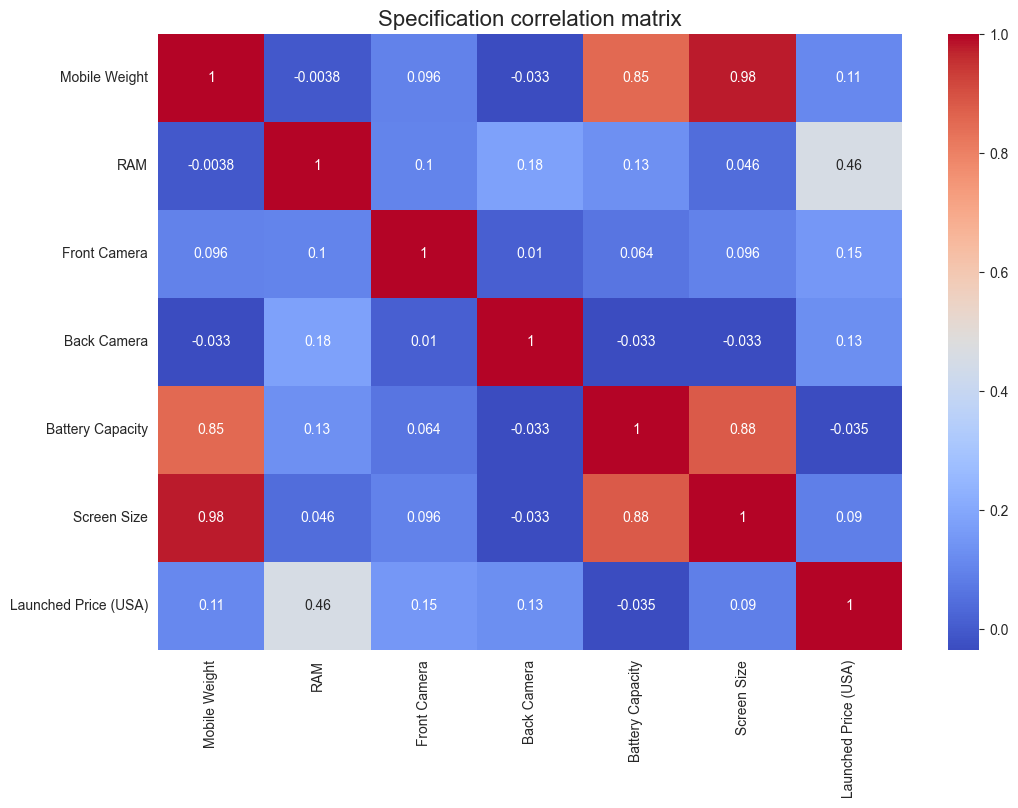

In [36]:
corr = df[['Mobile Weight', 'RAM', 'Front Camera', 'Back Camera', 'Battery Capacity', 'Screen Size', 'Launched Price (USA)']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Specification correlation matrix', fontsize=16)
plt.show()

C:\Users\Bablu\AppData\Local\Temp\ipykernel_7104\964213954.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
C:\Users\Bablu\AppData\Local\Temp\ipykernel_7104\964213954.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


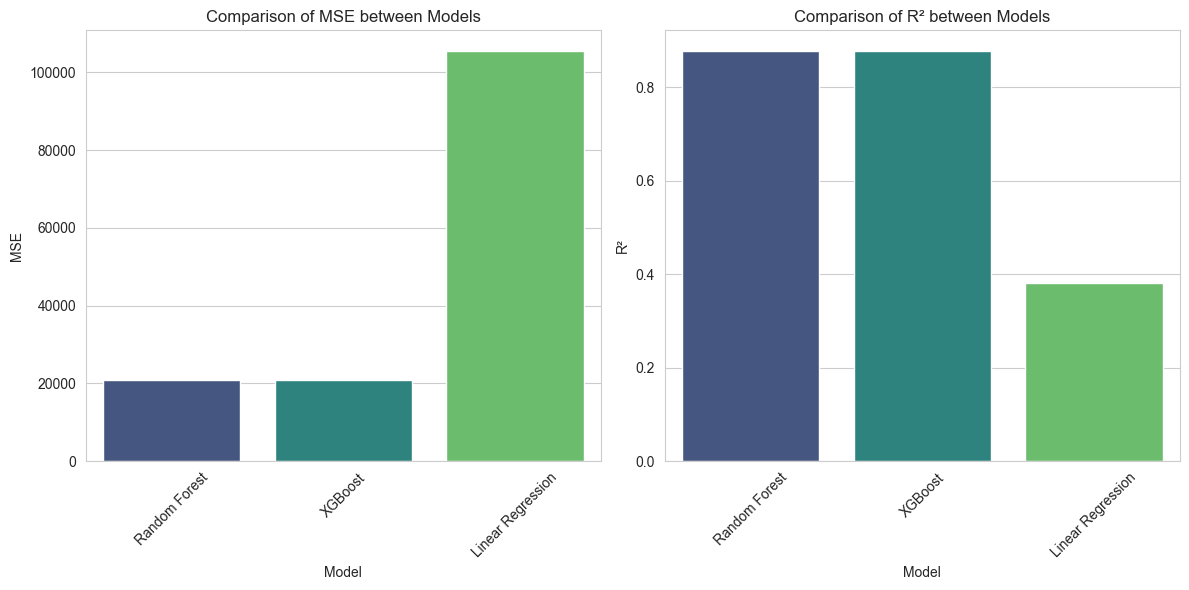

               Model            MSE        R²
1      Random Forest   20824.135305  0.877923
2            XGBoost   20965.965096  0.877091
0  Linear Regression  105553.344823  0.381214

Predicted Prices for New Device:
Linear Regression: $692.07
Random Forest: $684.69
XGBoost: $734.94


In [37]:
def train_and_evaluate_models(df):
    X = df[['RAM', 'Battery Capacity', 'Screen Size', 'Front Camera', 'Back Camera', 'Mobile Weight', 'Launched Year']]
    y = df['Launched Price (USA)']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42)
    }
    
    results = {name: {'MSE': mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test)),
                      'R²': r2_score(y_test, model.predict(X_test))} 
               for name, model in models.items()}
    
    results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
    results_df.sort_values(by='R²', ascending=False, inplace=True)
    
    plt.figure(figsize=(12, 6))
    for i, metric in enumerate(['MSE', 'R²'], 1):
        plt.subplot(1, 2, i)
        sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
        plt.title(f'Comparison of {metric} between Models')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return results_df, models

def predict_new_device(models, new_device):
    X_new = pd.DataFrame([new_device])
    return {name: model.predict(X_new)[0] for name, model in models.items()}

df.columns = ['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera', 'Back Camera', 
              'Processor', 'Battery Capacity', 'Screen Size', 'Launched Price (Pakistan)', 'Launched Price (India)', 
              'Launched Price (China)', 'Launched Price (USA)', 'Launched Price(Dubai)', 'Launched Year']

df = df.drop(['Company Name', 'Model Name', 'Launched Price (Pakistan)', 'Launched Price (India)', 
              'Launched Price (China)', 'Launched Price(Dubai)'], axis=1)

results_df, trained_models = train_and_evaluate_models(df)
print(results_df)

new_device = {
    'RAM': 8, 'Battery Capacity': 4000, 'Screen Size': 6.5, 'Front Camera': 12.0,
    'Back Camera': 48.0, 'Mobile Weight': 180.0, 'Launched Year': 2023
}

predictions = predict_new_device(trained_models, new_device)
print("\nPredicted Prices for New Device:")
for model, price in predictions.items():
    print(f"{model}: ${price:.2f}")